In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(datatype ="xor"):
    data=[[0,0],[1,0],[0,1],[1,1]]
    if datatype=="xor":
        return (np.array(data),np.array([int(a[0] ^ a[1]) for a in data]) )
    elif datatype=="and":
        return (np.array(data),np.array([int(a[0] and a[1]) for a in data]) )
    elif datatype=="or":
        return (np.array(data),np.array([int(a[0] or a[1]) for a in data]) )
    elif datatype=="nand":
        return (np.array(data),1-np.array([int(a[0] and a[1]) for a in data]))
    elif datatype=="nor":
        return (np.array(data),1-np.array([int(a[0] or a[1]) for a in data]))
    
    
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoidprime(x):
    return np.exp(x)/((np.exp(x)+1)**2)

def squared_error(x,y):
    return (x-y)**2

In [2]:
class Our_Mlp():
    def __init__(self,number_of_h_ls=1):
        
        self.n_h_ls=number_of_h_ls
        self.h_ls_values = np.zeros((4,number_of_h_ls))
        self.h_ls_weights = np.random.normal(-5,5,(4,number_of_h_ls,4))
        self.h_ls_weights[:,0,2:4]=np.nan # first layer has only two inputs -> set other weights to nan
        self.h_ls_alpha =  np.ones((4,number_of_h_ls)) # we set the learning_rate to one
        self.h_ls_biases =  np.random.normal(-5,5,(4,number_of_h_ls))
        
        
        # We will store the drives of the perceptrons for the backprob
        
        self.h_ls_drives = np.zeros((4,number_of_h_ls))
        
        self.h_ls_deltas  = np.zeros((4,number_of_h_ls))
        
        
        # No we define the value, weights, bias, learning rate of our output neuron
        
        self.o_v=0
        self.o_w=np.random.normal(-5,5,4)
        self.o_b=float(np.random.normal(-5,5,1))
        self.o_alpha=1
        self.o_delta = 0
        self.o_drive = 0
        
        
    def forward_step(self,input_data):
        """
        input_data is supposed to an 1d numpy.array with shape=(2)
        """
        
        # So now we have to calculate the input for the perceptrons of the first hidden layer which get 2 inputs each
        for y in range(0,4):
            
            self.h_ls_drives[y,0]=np.multiply(self.h_ls_weights[y,0,0:2],input_data).sum() + self.h_ls_biases[y,0]

            self.h_ls_values[y,0]=sigmoid(self.h_ls_drives[y,0])
            
        # Calculate the next hidden layers
            
        for x in range(1,self.n_h_ls):
            for y in range(0,4):
                self.h_ls_drives[y,x]=np.multiply(self.h_ls_weights[y,x,:],self.h_ls_values[:,x-1]).sum() + self.h_ls_biases[y,x]
                self.h_ls_values[y,x]=sigmoid(self.h_ls_drives[y,x])
        
        # Last layer to output neuron
        self.o_drive= np.multiply(self.o_w,self.h_ls_values[:,-1]).sum() + self.o_b
        
        self.o_v= sigmoid(self.o_drive)
        
        # let's return the output
        
        return self.o_v
    
    
    
    def backprop_step(self,solution):
        
        self.o_delta = 2*(self.o_v-solution)* sigmoidprime(self.o_drive)
        
        # update the weitghs
        
        self.o_w = self.o_w - self.o_alpha* self.o_w * self.o_delta
        
        # update the bias
        
        self.o_b = self.o_b - self.o_b * self.o_alpha * self.o_delta
        
        # now for the neurons of the last hidden layer
        for y in range(0,4):
            self.h_ls_deltas[y,-1] = sigmoidprime(self.h_ls_drives[y,-1]) * self.o_w[y] * self.o_delta
            self.h_ls_weights[y,-1,:] = self.h_ls_weights[y,-1,:] - self.h_ls_weights[y,-1,:]  * self.h_ls_alpha[y,-1] * self.h_ls_deltas[y,-1]
            
        # for the rest of the hidden layer
        
        

In [3]:
a = Our_Mlp()

In [4]:
data = random_data()

In [5]:
def tick(MLP,data):
    input_values, solution = data
    
    assert(input_values.shape[0]==solution.size)
    
    accuracy_of_loss = 0.0
    
    for i, input_value in enumerate(input_values):
        accuracy_of_loss+= squared_error(MLP.forward_step(input_value),solution[i])
        MLP.backprop_step(solution[i])
        
    return accuracy_of_loss/4

In [6]:
x_axes= np.linspace(0,10000,num=1000001)

In [7]:
erg = np.array([tick(a,data) for i in x_axes])

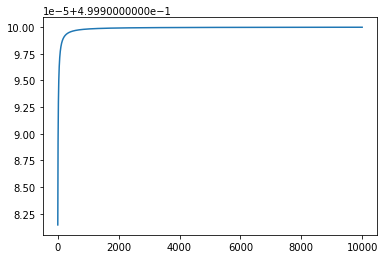

In [8]:
fig, ax = plt.subplots()
ax.plot(x_axes, erg) 